Installation des requirements

In [25]:
! pip install --no-cache-dir -r requirement.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for argparse from https://files.pythonhosted.org/packages/f2/94/3af39d34be01a24a6e65433d19e107099374224905f1e0cc6bbe1fd22a2f/argparse-1.4.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Import des librairies nécessaires

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns

Création du Dataset panda d'après le fichier "data.csv"

In [84]:
data_1				= pd.read_csv("data.csv", sep = ";")
#print(data_1.shape)

(3114, 514)
(2785, 514)
329
(2785, 512)
(2785,)


Certaines classes posent problème car elles sont trop prédites par le classifier, On les retire donc ici (classes trop prédites par rapport aux autres)

In [ ]:
data                = data_1[data_1["Target"] != 29]
data                = data[data["Target"] != 28]
data                = data[data["Target"] != 24]
data                = data[data["Target"] != 18]
#print(data.shape)
#print(data_1.shape[0]- data.shape[0])

Définition des variables ( x ) et des classes ( y ) puis séparation en jeux de données de test et d'entrainement

In [ ]:
x					= data.iloc[:,2:].values
#print(x.shape)
y					= data.iloc[:,1].values
#print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #20% pour test, 80% pour entrainement

Création du model et de la validation curve avec l'emploi d'une cross-validation

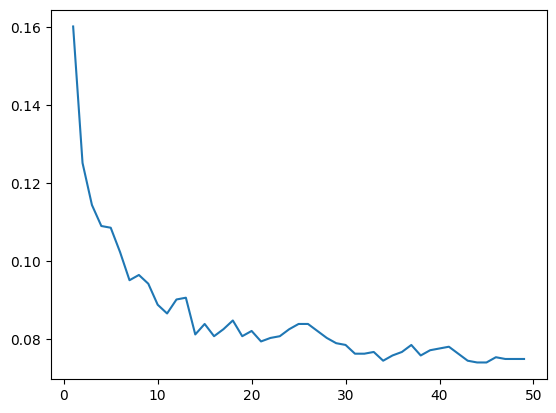

In [85]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, x_train, y_train, param_name='n_neighbors', param_range= k, cv = 5)

plt.plot(k, val_score.mean(axis=1))

Utilisation de GridSearch pour faire varier les hyperparamètres

In [86]:
param_grid = {'n_neighbors' : np.arange(1, 20), 'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Affichage des hyperparamètres avec les meilleurs résultats

In [87]:
grid.best_score_

0.16922456794477753

In [88]:
grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 1}

In [89]:
model = grid.best_estimator_

Affichage des scores et d'une matrice de confusion retranscrite sur une heatmap

In [90]:
model.score(x_test, y_test)

0.1992818671454219

In [97]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred )

<Axes: >

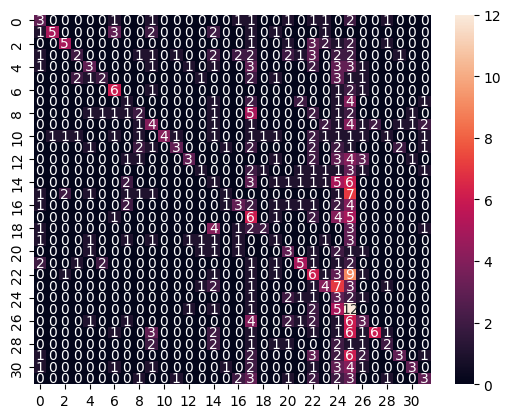

In [98]:
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot= True)


On voit bien sur cette matrice de confusion que le classifier à tendance à trop prédire une seule classe ( ici la 25), cet effet se retrouvait de manière plus intense sur les classes retirées du jeu de données 

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.21      0.23      0.22        13
           2       0.83      0.31      0.45        16
           3       0.56      0.31      0.40        16
           4       0.33      0.09      0.14        23
           5       0.30      0.16      0.21        19
           6       0.40      0.14      0.21        14
           7       0.40      0.55      0.46        11
           8       0.10      0.08      0.09        12
           9       0.20      0.11      0.14        18
          10       0.21      0.19      0.20        21
          11       1.00      0.18      0.31        22
          12       0.50      0.17      0.25        18
          13       0.50      0.16      0.24        19
          14       0.20      0.08      0.11        13
          15       0.04      0.05      0.04        22
          16       0.25      0.06      0.10        16
          17       0.27      0.16      0.20        19
          19       0.11    

[ 178  356  534  712  891 1069 1247 1425 1603 1782]


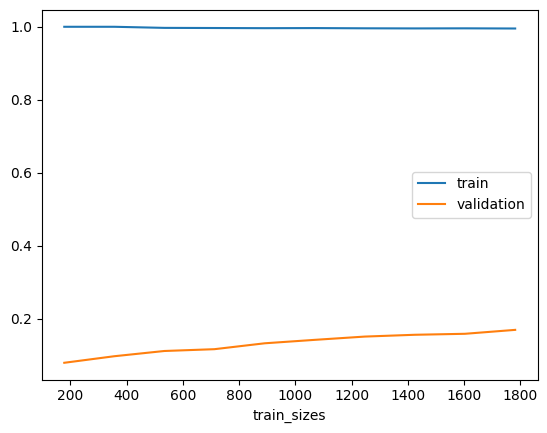

In [103]:
N, train_score_lc, val_score_lc = learning_curve(model, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5)

print(N)
plt.plot(N, train_score_lc.mean(axis=1), label = 'train' )
plt.plot(N, val_score_lc.mean(axis=1), label = 'validation' )
plt.xlabel('train_sizes')
plt.legend()

D'après la learning curve ci-dessus, on comprend que notre 